In [140]:
import seaborn as sns
df= sns.load_dataset("diamonds")
df=df.select_dtypes(include= ['int64', 'float64'])
df= df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [141]:
df_table= df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

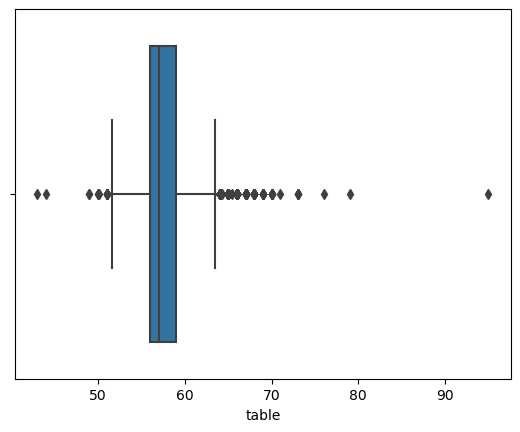

In [142]:
sns.boxplot(x=df_table);

In [143]:
Q1= df_table.quantile(0.25)
Q3= df_table.quantile(0.75)
IQR= Q3-Q1

In [144]:
Q1

56.0

In [145]:
Q3

59.0

In [146]:
IQR

3.0

In [147]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3+ 1.5*IQR

In [148]:
alt_sinir

51.5

In [149]:
ust_sinir

63.5

In [150]:
(df_table < alt_sinir)  | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [151]:
aykiri_tf = (df_table < alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [152]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [153]:
df_table[aykiri_tf].index

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')

In [154]:
aykiri_tf_ust = (df_table > ust_sinir)
aykiri_tf_ust.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [155]:
df_table[aykiri_tf_ust]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [156]:
df_table[aykiri_tf_ust].index

Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,   359,
       ...
       53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757, 53785],
      dtype='int64', length=589)

AYKIRI DEĞER PROBLEMİNİ ÇÖZMEK


In [157]:
import pandas as pd

In [158]:
df_table=pd.DataFrame(df_table)

In [159]:
df_table.shape

(53940, 1)

In [160]:
temiz_df=df_table[~((df_table<alt_sinir) | (df_table>ust_sinir)).any(axis=1)]

In [161]:
temiz_df.shape

(53335, 1)

ORTALAMA YÖNTEMİ

In [162]:
df_table.mean() 

table    57.457184
dtype: float64

In [163]:
df_table[aykiri_tf] = df_table.mean() 

In [164]:
df_table[aykiri_tf]

,table
1515,57.457184
3238,57.457184
3979,57.457184
4150,57.457184
5979,57.457184
7418,57.457184
8853,57.457184
11368,57.457184
22701,57.457184
25179,57.457184


In [165]:
df_table[aykiri_tf_ust] = df_table.mean()

In [166]:
df_table[aykiri_tf_ust]

,table
2,57.459505
91,57.459505
145,57.459505
219,57.459505
227,57.459505
...,...
53695,57.459505
53697,57.459505
53756,57.459505
53757,57.459505


BASKILAMA YÖNTEMİ

In [167]:
alt_sinir

51.5

In [168]:
df_table[aykiri_tf]=alt_sinir

In [169]:
df_table[aykiri_tf]

,table
1515,51.5
3238,51.5
3979,51.5
4150,51.5
5979,51.5
7418,51.5
8853,51.5
11368,51.5
22701,51.5
25179,51.5


In [170]:
df_table[aykiri_tf_ust]=ust_sinir
df_table[aykiri_tf_ust]

,table
2,63.5
91,63.5
145,63.5
219,63.5
227,63.5
...,...
53695,63.5
53697,63.5
53756,63.5
53757,63.5


In [171]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [172]:
clf = LocalOutlierFactor(n_neighbors=20, contamination = 0.1)  #20 neighbor, kirlilik oranı(contmn)=0.1 olsun dedik

In [173]:
clf.fit_predict(df)   #fit etmek için

array([-1, -1, -1, ...,  1,  1,  1])

In [174]:
df_scores = clf.negative_outlier_factor_   #score ları kaydetmek için

In [175]:
#df_scores.head() diyemeyiz çünkü bu bir numpy işlemidir, ama df pandas dataframei demek
df_scores[0:10]
#

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [176]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [177]:
esik_deger=np.sort(df_scores)[13]

In [178]:
aykiri_tf= df_scores > esik_deger  #bu aykırı değerlerin tam tersini temsil ediyor 
                                   #AYKRı değerler için ãykiri_tf diyeceğiz

In [179]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [180]:
###silme yöntemi

In [181]:
yeni_df = df[df_scores > esik_deger]

In [182]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [183]:
df[df_scores<esik_deger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [184]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [185]:
baski_deger = df[df_scores == esik_deger]
#baskılamak için baskı değer

In [186]:
aykirilar = df[~aykiri_tf]

In [187]:
aykirilar.to_records(index=False) 
#pandas dfi numpy arraye çevirdik

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [188]:
res = aykirilar.to_records(index=False)

In [189]:
res[:]= baski_deger.to_records(index=False)
# tüm elemanları baskı değerimizle eşitledik.

In [190]:
res
#reslerin indexi yok. 
## ama olması lazım, aşağıda halledeceğiz

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [191]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [192]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index=df[~aykiri_tf].index)  #reslere ~aykiri_tfin indexlerini atadık

In [193]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
